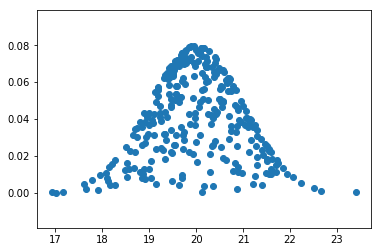

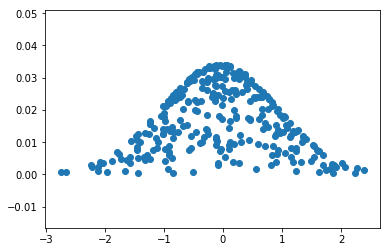

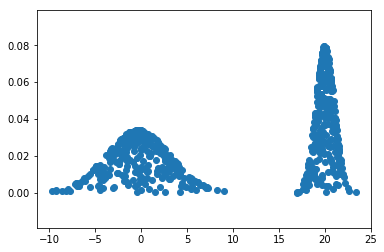

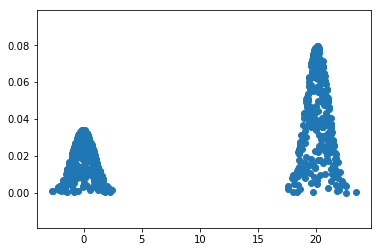

In [127]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from math import sqrt
from numpy import zeros
from numpy import numarray
from sklearn import mixture
from scipy.stats import norm

'''
# generate sample points
num_pts = 500
sample_xs = np.random.uniform(0, 200, size=num_pts)
sample_ys = np.random.uniform(0, 1, size=num_pts)

# define distribution
mean = 50
sigma = 10

# figure out "normalized" pdf vals at sample points
max_pdf = mlab.normpdf(mean, mean, sigma)

sample_pdf_vals = mlab.normpdf(sample_xs, mean, sigma) / max_pdf

# which ones are under the curve?
under_curve = sample_ys < sample_pdf_vals

# get pdf vals to plot
x = np.linspace(0, 200, 1000)
pdf_vals = mlab.normpdf(x, mean, sigma) / max_pdf

# plot the samples and the curve
colors = np.array(['cyan' if b else 'red' for b in under_curve])
fig = plt.figure()
ax = fig.add_subplot(121)

ax.scatter(sample_xs, sample_ys, c=colors)

plt.plot(x, pdf_vals)
plt.show()
#print(np.roots([sample_xs,sample_ys]))
'''

n_samples = 300
# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

#plt.scatter(shifted_gaussian[:,0], shifted_gaussian[:,1])
#plt.show()
# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)
#plt.scatter(stretched_gaussian[:,0], stretched_gaussian[:,1])
#plt.show()

clf = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(np.vstack([shifted_gaussian, stretched_gaussian]))

pdfsShiftedGauss = np.exp(clf.score_samples(shifted_gaussian))
pdfsStrechedGauss = np.exp(clf.score_samples(stretched_gaussian))
'''
x = np.linspace(np.min(shifted_gaussian), np.max(shifted_gaussian), len(shifted_gaussian))
pdfs = norm.pdf(x)
print(len(x))
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.figure()

ax.plot(x, pdfs, 'k-', lw=2, label='frozen pdf')
plt.show()
'''
plt.scatter(shifted_gaussian[:,0], pdfsShiftedGauss)
plt.show()
plt.scatter(stretched_gaussian[:,1], pdfsStrechedGauss)
plt.show()
plt.scatter(np.hstack([shifted_gaussian[:,0], stretched_gaussian[:,0]]), np.hstack([pdfsShiftedGauss, pdfsStrechedGauss]))
plt.show()
plt.scatter(np.hstack([shifted_gaussian[:,1], stretched_gaussian[:,1]]), np.hstack([pdfsShiftedGauss, pdfsStrechedGauss]))
plt.show()

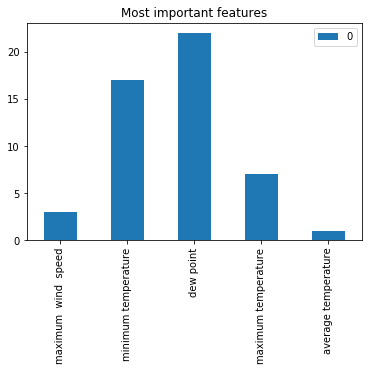

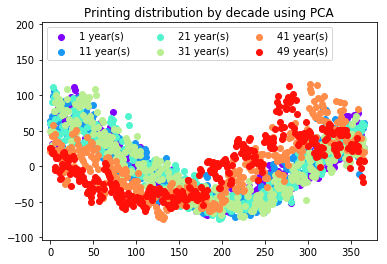

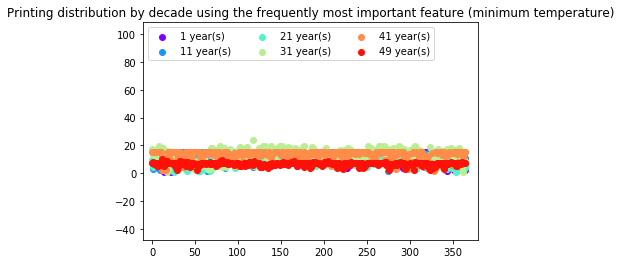

In [32]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn import mixture
from collections import Counter


def mostImportantFeature(X, y):
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X, y)
    return np.argsort(clf.feature_importances_)[-1]
    

def maps(num):
    m = {}
    m[0]="average temperature"
    m[1]="minimum temperature"
    m[2]="maximum temperature"
    m[3]="dew point"
    m[4]="sea level pressure"
    m[5]="visibility"
    m[6]="average wind speed"
    m[7]="maximum  wind  speed"
    
    return m[num]


def printMostImportantFeatureByYear(dataValues, dataLabels, initialDataLength, finalDataLength, sizeStep):
    
    arrImportant=[]
    
    for i in range(50):
        X = dataValues.loc[initialDataLength:finalDataLength].copy().values
        y = dataLabels.loc[initialDataLength:finalDataLength].copy().values
        arrImportant.append(maps(mostImportantFeature(X, y)))
        initialDataLength = finalDataLength
        finalDataLength += sizeStep
    
    letter_counts = Counter(arrImportant)
    df = pd.DataFrame.from_dict(letter_counts, orient='index')
    df.plot(kind='bar')
    plt.title("Most important features")
    plt.show()   
    
    
def printDistributionByDecade(dataValues, dataLabels, initialDataLength, finalDataLength, sizeStep, usePCA):
    title='Printing distribution by decade using'
    colors = cm.rainbow(np.linspace(0, 1, 50))
    if usePCA:
        title = "{} PCA".format(title)
    else:
        title = "{} the frequently most important feature".format(title)
        
    for i in range(50):

        X = dataValues.loc[initialDataLength:finalDataLength].copy().values
        y = dataLabels.loc[initialDataLength:finalDataLength].copy().values

        xAxis = [i for i in range(len(X))]

        if usePCA:
            pca = PCA(n_components=1)
            X = pca.fit_transform(X)
        else:
            X = X[:,3]#dew point
        
        if i % 10 == 0 or i == 48:
            plt.scatter(xAxis, X, c=colors[i], label="{} year(s)".format(i+1))

        initialDataLength = finalDataLength
        finalDataLength += sizeStep

    plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=10)
    plt.axis([-10,380,min(X)-50,max(X)+100])
    plt.title(title)
    plt.show()    
    
    
def main():
    path = os.getcwd()+'\\data\\'
    dataValues = pd.read_csv(path+'noaa_data.csv',sep = ",")
    dataLabels = pd.read_csv(path+'noaa_label.csv',sep = ",")
    initialDataLength=0
    finalDataLength=365
    sizeStep=365
    
    printMostImportantFeatureByYear(dataValues, dataLabels, initialDataLength, finalDataLength, sizeStep)
    
    printDistributionByDecade(dataValues, dataLabels, initialDataLength, finalDataLength, sizeStep, True)

    printDistributionByDecade(dataValues, dataLabels, initialDataLength, finalDataLength, sizeStep, False)
    
    #print("Printing pdf by decade")
    #print("Using PCA")
    #printPdfByDecade(dataValues, dataLabels, initialDataLength, finalDataLength, sizeStep, True)

    #print("Using the frequently most important feature (minimum temperature)")
    #printPdfByDecade(dataValues, dataLabels, initialDataLength, finalDataLength, sizeStep, False)
    
main()

Area under curves  0.211299547334


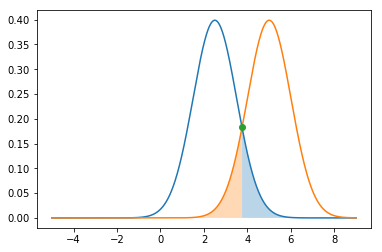

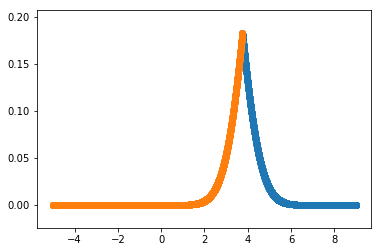

In [2]:
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import norm
norm.cdf(1.96)

def solve(m1,m2,std1,std2):
  a = 1/(2*std1**2) - 1/(2*std2**2)
  b = m2/(std2**2) - m1/(std1**2)
  c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
  return np.roots([a,b,c])

m1 = 2.5
std1 = 1.0
m2 = 5.0
std2 = 1.0

#Get point of intersect
result = solve(m1,m2,std1,std2)

#Get point on surface
x = np.linspace(-5,9,10000)

plot1=plt.plot(x,norm.pdf(x,m1,std1))
plot2=plt.plot(x,norm.pdf(x,m2,std2))
plot3=plt.plot(result,norm.pdf(result,m1,std1),'o')

#Plots integrated area
r = result[0]
olap = plt.fill_between(x[x>r], 0, norm.pdf(x[x>r],m1,std1),alpha=0.3)
olap = plt.fill_between(x[x<r], 0, norm.pdf(x[x<r],m2,std2),alpha=0.3)

# integrate
area = norm.cdf(r,m2,std2) + (1.-norm.cdf(r,m1,std1))
print("Area under curves ", area)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x[x>r], norm.pdf(x[x>r],m1,std1))
ax.scatter(x[x<r], norm.pdf(x[x<r],m2,std2))
plt.show()